### RMSprop

AdaGrad は次元に応じた学習率の変更を可能にしたが，最初に急な坂になっていて，その後も坂が続く場合に対応していなかった．すなわち，一度学習率が0に十分近くなってしまった次元に関しては，まだ坂があってもほとんど更新されなくなってしまうことである．
理解のために下図を見て欲しい．最初パラメータは地点Aにあったとしよう．地点Aでは勾配が急になっているので，このパラメータ w1
 の方向には更新量が大きくなる．そのため，AdaGrad の第二式における分母が大きくなる．ゆえに，地点Bに差し掛かったときに既に分母が大きくなってしまっているためにあまり更新がされなくなってしまう．


$$
\begin{align}
    \boldsymbol{\nu}^t &= \gamma\boldsymbol{\nu}^{t-1} + (1 - \gamma) \frac{\partial L}{\partial \boldsymbol{w}}^t\odot\frac{\partial L}{\partial \boldsymbol{w}}^t \\
    \Delta \boldsymbol{w}^t &= \alpha \frac{1}{\sqrt{\hat{\boldsymbol{\nu}}_t + \epsilon}}\frac{\partial L}{\partial \boldsymbol{w}}^t \\
    \boldsymbol{w}^{t+1} &\leftarrow \boldsymbol{w}^t - \Delta\boldsymbol{w}^t
\end{align}
$$

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
class RMSprop:
    def __init__(self, f, df, alpha=0.01, gamma=0.99, eps=1e-6):
        self.f_= f
        self.df_= df
        self.alpha_= alpha
        self.gamma_ = gamma
        self.eps_= eps
        self.path_= None
        
    def solve(self, init):
        x = init
        v = np.zeros_like(x)
        delta_x = np.zeros_like(x)
        path = []
        path.append(x)
        grad = self.df_(x)
        
        while (grad**2).sum() > self.eps_**2:
            grad = self.df_(x)
            v = self.gamma_ * v + (1 - self.gamma_) * grad * grad # 未探索領域促進項
            delta_x = self.alpha_ * grad/ (np.sqrt(v + self.eps_))
            x = x - delta_x
            path.append(x)
            
        self.path_ = np.array(path)
        self.x_ = x
        self.opt_ = self.f_(x)

勾配降下法

In [11]:
class GradientDescent:
    def __init__(self, f, df, alpha=0.01, eps=1e-6):
        self.f_= f
        self.df_= df
        self.alpha_= alpha
        self.eps_= eps
        self.path_= None
        
    def solve(self, init):
        x = init
        path = []
        path.append(x)
        grad = self.df_(x)
        
        while (grad**2).sum() > self.eps_**2:
            grad = self.df_(x)
            x = x - self.alpha_ * grad
            path.append(x)
            
        self.path_ = np.array(path)
        self.x_ = x
        self.opt_ = self.f_(x)

In [12]:
# 目的関数
def f(xx):
    x = xx[0]
    y = xx[1]
    return 5 * x ** 2 - 6 * x * y + 3 * y ** 2 + 6 * x - 6 * y

# 目的関数の微分
def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([10 * x - 6 * y + 6, -6 * x + 6 * y - 6])

In [13]:
algo = GradientDescent(f, df)
initial = np.array([1.0, 3.2])
algo.solve(initial)
print(algo.x_)
print(algo.opt_)

[3.38876045e-07 1.00000047e+00]
-2.9999999999997176


### RMSprop Test

[2.32522661e-07 1.00000038e+00]
-2.9999999999998304


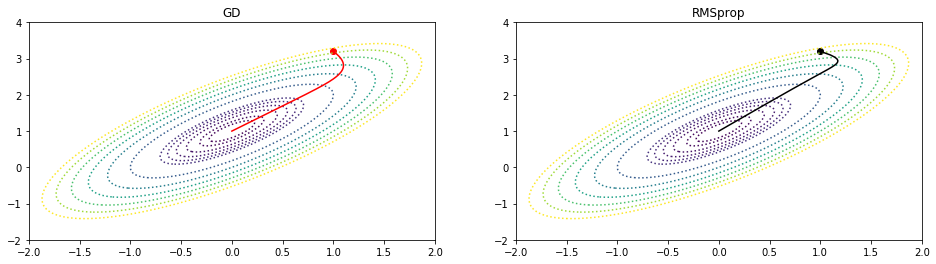

In [14]:

fig, ax = plt.subplots(1,2, figsize=(16,4))

# 左図 init (1.2, 3.2) SGD
ax[0].scatter(initial[0], initial[1], color="r", marker="o")
ax[0].plot(algo.path_[:, 0], algo.path_[:, 1], color="r", linewidth=1.5)

xs = np.linspace(-2, 2, 300)
ys = np.linspace(-2, 4, 400)
xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
levels = [-3, -2.9, -2.8, -2.6, -2.4, -2.2, -2, -1, 0, 1, 2, 3, 4]
ax[0].contour(xs, ys, f(xx).reshape(xmesh.shape), levels=levels, linestyles="dotted")

ax[0].set_ylim([-2, 4])
ax[0].set_xlim([-2, 2])
ax[0].set_title('GD')

# 右図 init (1.2, 3.2)
Nalgo = RMSprop(f, df)
initial = np.array([1.0, 3.2])
Nalgo.solve(initial)
print(Nalgo.x_)
print(Nalgo.opt_)

ax[1].scatter(initial[0], initial[1], color="k", marker="o")
ax[1].plot(Nalgo.path_[:, 0], Nalgo.path_[:, 1], color="k", linewidth=1.5)
ax[1].contour(xs, ys, f(xx).reshape(xmesh.shape), levels=levels, linestyles="dotted")

ax[1].set_ylim([-2, 4])
ax[1].set_xlim([-2, 2])
ax[1].set_title('RMSprop')

plt.show()